# Исследовательский проект

Бершицкий Дмитрий, Пономарев Николай

Данные взяты из https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Demos.SystemParametersInfo import new_h
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

SPI_GETMOUSESPEED
	original setting: 10
	new value: 11
SPI_GETACTIVEWNDTRKTIMEOUT
	original setting: 0
	new value: 1
SPI_GETCARETWIDTH
	original setting: 1
	new value: 2
SPI_GETFOREGROUNDFLASHCOUNT
	original setting: 7
	new value: 8
SPI_GETFOREGROUNDLOCKTIMEOUT
	original setting: 200000


error: (87, 'SystemParametersInfo', 'Параметр задан неверно.')

In [82]:
df_source = pd.read_csv('car-selling.csv')
df = df_source.copy()

In [83]:
df_source

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00


In [84]:
# Посмотрим на типы данных и наличие пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [85]:
# Посчитаем количество Null значений для каждой переменной
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

# 1. Описание датасета

Датасет содержит 20 столбцов и 2059 строк. В нем содержатся следующие переменные:

| Переменная          | Описание                          | Тип переменной               | Тип данных | Единицы            | Пропуски |
|---------------------|---------------------------------|------------------------------|------------|--------------------|----------|
| Make               | Марка автомобиля               | Категориальная (номинальная) | string     | -                  | 0        |
| Model              | Модель автомобиля             | Категориальная (номинальная) | string     | -                  | 0        |
| Price              | Цена автомобиля               | Метрическая                  | integer    | INR                | 0        |
| Year               | Год выпуска                   | Категориальная (порядковая)  | integer    | год                | 0        |
| Kilometer          | Пробег автомобиля            | Метрическая                  | integer    | км                 | 0        |
| Fuel Type         | Тип топлива                   | Категориальная (номинальная) | string     | -                  | 0        |
| Transmission       | Тип трансмиссии              | Категориальная (номинальная) | string     | -                  | 0        |
| Location          | Город продажи                 | Категориальная (номинальная) | string     | -                  | 0        |
| Color             | Цвет автомобиля               | Категориальная (номинальная) | string     | -                  | 0        |
| Owner             | Количество владельцев         | Категориальная (порядковая)  | string     | -                  | 0        |
| Seller Type       | Тип продавца                  | Категориальная (номинальная) | string     | -                  | 0        |
| Engine           | Объем двигателя              | Метрическая                  | string     | см³                | 80       |
| Max Power        | Макс. мощность               | Метрическая                  | string     | л.с. @ об/мин      | 80       |
| Max Torque       | Макс. крутящий момент         | Метрическая                  | string     | Нм @ об/мин        | 80       |
| Drivetrain       | Тип привода                   | Категориальная (номинальная) | string     | -                  | 136      |
| Length           | Длина автомобиля             | Метрическая                  | float      | мм                 | 64       |
| Width            | Ширина автомобиля            | Метрическая                  | float      | мм                 | 64       |
| Height           | Высота автомобиля            | Метрическая                  | float      | мм                 | 64       |
| Seating Capacity | Кол-во мест                  | Метрическая                  | float      | -                  | 64       |
| Fuel Tank Capacity | Объем бака                 | Метрическая                  | float      | литры              | 113      |


# 2. Изменение типов данных

Для начала переведем Engine, Max Power и Max Torque в float.

1) Engine содержит значения в виде '1197 cc', '1498 cc' и т.д., поэтому уберем 'cc' и преобразуем в int.
2) Max Power содержит значения в виде '90 bhp @ 6000 rpm', '103 bhp @ 3600 rpm' и т.д., поэтому уберем ' bhp @ 3000 rpm' и преобразуем в int, так как количество оборотов, при котором достигается максимальная мощность, нас не интересует.
3) Max Torque содержит значения в виде '113 Nm @ 4200rpm', '250 Nm @ 1500-2500rpm' и т.д., поэтому уберем ' Nm @ 4200rpm' и преобразуем в int, так как количество оборотов, при котором достигается максимальный крутящий момент, нас не интересует.

In [86]:
# Преобразуем только те строки, которые не NaN
df['Engine'] = df['Engine'].str.replace(' cc', '').dropna().astype(float)
df['Max Power'] = df['Max Power'].str.split('@').str[0].str.replace('bhp', '').dropna().astype(float)
df['Max Torque'] = df['Max Torque'].str.split('@').str[0].str.replace('Nm', '').dropna().astype(float)

Приведем Owner к числовому виду, где 1 - один владелец, 2 - два владельца и т.д.

In [87]:
df['Owner'].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [88]:
df[df['Owner'] == 'UnRegistered Car']

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
139,Audi,Q5 45 TFSI Premium Plus,5651000,2022,1,Petrol,Automatic,Delhi,Blue,UnRegistered Car,Individual,"1,984.00",248.00,370.00,AWD,"4,663.00","1,898.00","1,659.00",5.00,70.00
194,Audi,Q3 2.0 TDI quattro Premium,1350000,2012,72000,Diesel,Automatic,Hyderabad,White,UnRegistered Car,Individual,"1,968.00",174.00,380.00,AWD,"4,385.00","1,831.00","1,608.00",5.00,64.00
222,Audi,A6 2.0 TFSi Technology Pack,7200000,2021,20000,Petrol,Automatic,Bangalore,White,UnRegistered Car,Individual,"1,984.00",180.00,320.00,FWD,"4,915.00","1,874.00","1,455.00",5.00,75.00
362,Honda,City ZX CVT Petrol,1700000,2022,8530,Petrol,Automatic,Pune,White,UnRegistered Car,Individual,"1,498.00",119.00,145.00,FWD,"4,549.00","1,748.00","1,489.00",5.00,40.00
389,Toyota,Innova 2.0 V,575000,2013,82000,Petrol,Manual,Varanasi,Gold,UnRegistered Car,Individual,"1,998.00",136.00,182.00,NaN,"4,555.00","1,770.00","1,755.00",8.00,55.00
479,Mercedes-Benz,GLC 220d 4MATIC Progressive,6400000,2022,5500,Diesel,Automatic,Hyderabad,White,UnRegistered Car,Individual,"1,950.00",192.00,400.00,AWD,"4,658.00","1,890.00","1,644.00",5.00,66.00
756,Mercedes-Benz,C-Class 220 CDI AT,5400000,2022,4600,Diesel,Automatic,Bangalore,White,UnRegistered Car,Individual,"2,148.00",170.00,410.00,RWD,"4,596.00","1,770.00","1,447.00",5.00,66.00
815,Renault,Kwid 1.0 RXT [2016-2019],420000,2017,43000,Petrol,Manual,Hyderabad,Grey,UnRegistered Car,Individual,999.00,67.00,91.00,FWD,"3,679.00","1,579.00","1,478.00",5.00,28.00
839,Mercedes-Benz,A-Class Sedan 200d,4100000,2022,3826,Diesel,Automatic,Ahmedabad,White,UnRegistered Car,Individual,"1,950.00",147.00,320.00,FWD,"4,549.00","1,796.00","1,446.00",5.00,43.00
861,Audi,A4 Premium Plus 40 TFSI,4200000,2021,12321,Petrol,Automatic,Delhi,Black,UnRegistered Car,Individual,"1,984.00",188.00,320.00,FWD,"4,762.00","1,847.00","1,433.00",5.00,54.00


Заметим, что есть небольшое количество машин без регистрации, причем они в основном достаточно новые. Поэтому для таких авто будем считать, что у них был 1 владелец.

In [89]:
# Заменим значения в столбце 'Owner' на числовые
df['Owner'] = df['Owner'].replace({
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    'UnRegistered Car': 1,
    '4 or More': 5
})

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3726035780.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Owner'] = df['Owner'].replace({


Посмотрим на изменения в df:

In [90]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,1,Corporate,"1,198.00",87.00,109.00,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,2,Individual,"1,248.00",74.00,190.00,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,1,Individual,"1,197.00",79.00,112.76,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,1,Individual,"1,197.00",82.00,113.00,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,1,Individual,"2,393.00",148.00,343.00,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,1,Individual,"2,179.00",138.00,330.00,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,2,Individual,814.00,55.00,75.00,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,1,Individual,"1,196.00",70.00,102.00,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,1,Individual,"1,995.00",188.00,400.00,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00


# 3. Обработка пропусков

Как мы заметили, пропуски есть у переменных Engine, Max Power, Max Torque, Drivetrain, Length, Width, Height, Seating Capacity, Fuel Tank Capacity.

Заполним все пропуски медианой (в случае числовых переменных) или модой (в случае категориальной Drivetrain).

In [91]:
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].median())
df['Max Torque'] = df['Max Torque'].fillna(df['Max Torque'].median())
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].median())
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median())

In [92]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

Больше пропусков нет!

# 4. Новый столбец на основе предыдущих

Рассчитаем для каждой машины среднегодовой пробег. Эта информация может быть полезной, чтобы понять, насколько машина была эксплуатирована.

Автор не указал, в каком году был сделан датасет. Найдем год выпуска самой новой машины и будем считать, что данные актуальны на этот год.

In [93]:
max_year = df['Year'].max()
df['Kilometer Per Year'] = df['Kilometer'] / (max_year + 1 - df['Year'])

# 5. Категориальная переменная из метрической

В датасете есть некоторое количество машин с маленьким пробегом. Вероятно, это машины, которые были куплены, но не использовались или были куплены на перепродажу. Будем считать, что:

- Машина с пробегом менее 1000 км - новая
- Машина с пробегом от 1000 до 10000 км - почти новая
- Машина с пробегом от 10000 - б/у

In [94]:
df['Kilometer Category'] = pd.cut(df['Kilometer'], bins=[-1, 1000, 10000, df['Kilometer'].max()],
                                  labels=['New', 'Almost New', 'Used'])

In [95]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Kilometer Per Year,Kilometer Category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,1,...,87.00,109.00,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00,"14,525.00",Used
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,2,...,74.00,190.00,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00,"8,333.33",Used
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,1,...,79.00,112.76,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00,"5,583.33",Used
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,1,...,82.00,113.00,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00,"9,375.00",Used
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,1,...,148.00,343.00,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00,"13,800.00",Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,1,...,138.00,330.00,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00,"12,900.00",Used
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,2,...,55.00,75.00,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00,"9,222.22",Used
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,1,...,70.00,102.00,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00,"7,300.00",Used
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,1,...,188.00,400.00,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00,"12,094.80",Used


# 6. Цель и задачи исследования

Целью исследования является разносторонний анализ данных о продаже автомобилей:

- Выявление зависимостей между переменными
- Построение моделей для прогнозирования цены автомобиля и типа трансмиссии
- Выявление кластеров автомобилей

Задачи исследования:

1. Сформулировать гипотезы исследования.
2. Выявить тенденции и взаимосвязи, используя графики, сводные таблицы и описательные статистики.
3. Выявить корреляции между переменными.
4. Построить модель линейной регрессии для прогнозирования цены автомобиля.
5. Построить модель бинарной регрессии для прогнозирования типа трансмиссии автомобиля.
6. Провести кластерный анализ автомобилей.
7. Проверить, подтверждаются ли ранее сформулированные гипотезы.

# 7. Гипотезы исследования

Сформулируем ряд гипотез:

1. Гипотеза о взаимосвязи переменных:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют взаимосвязи между собой.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют взаимосвязь между собой.

2. Гипотеза о корреляции переменных:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не коррелируют между собой.
- Альтернативная гипотеза (H₁):
H₁: переменные коррелируют между собой.

3. Гипотеза о влиянии факторов на цену автомобиля:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют статистически значимого влияния на цену автомобиля.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют статистически значимое влияние на цену автомобиля.

4. Гипотеза о влиянии факторов на тип трансмиссии автомобиля:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют статистически значимого влияния на вероятность того, что автомобиль будет иметь автоматическую или механическую трансмиссию.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют статистически значимое влияние на вероятность того, что автомобиль будет иметь автоматическую или механическую трансмиссию.

5. Гипотеза о кластеризации автомобилей:

- Основная гипотеза (H₀):
H₀: данные о продаже автомобилей не могут быть разделены на кластеры.
- Альтернативная гипотеза (H₁):
H₁: данные о продаже автомобилей могут быть разделены на кластеры.

# 8. Визуализация данных

Построим графики для визуализации данных.

## 8.1. Распределение числовых переменных

Посмотрим, как распределены Price, Engine и Fuel Tank Capacity.

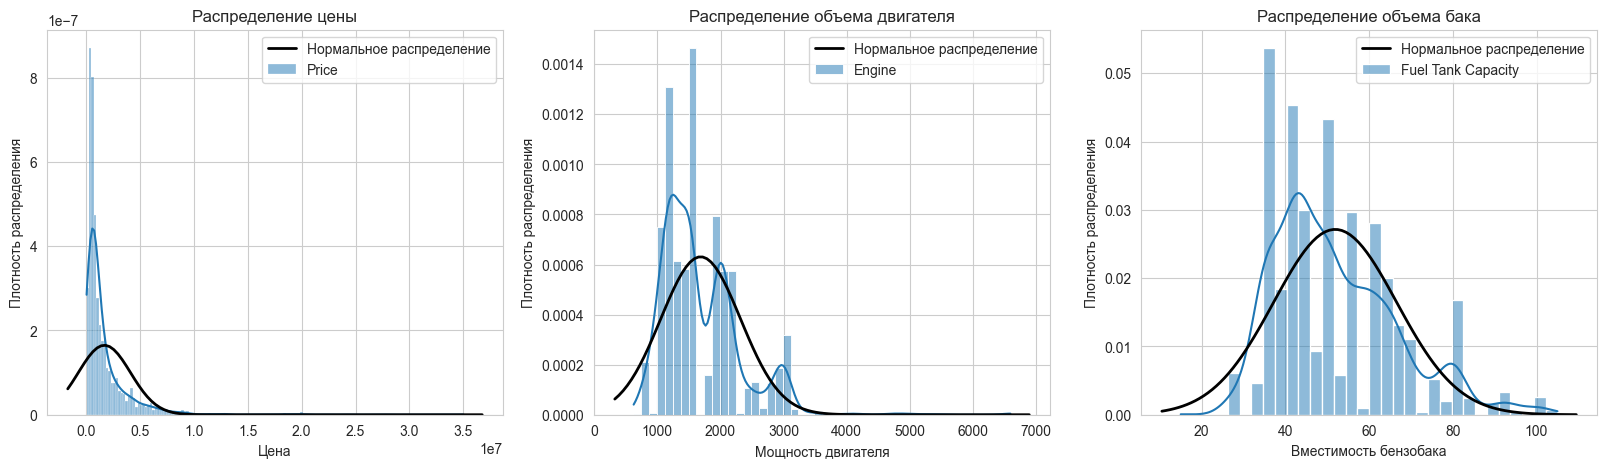

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the columns to plot
columns = ['Price', 'Engine', 'Fuel Tank Capacity']
titles = ['Распределение цены', 'Распределение объема двигателя', 'Распределение объема бака']
xlabels = ['Цена', 'Мощность двигателя', 'Вместимость бензобака']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the columns and plot
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, stat="density", ax=axes[i], label=col)
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, df[col].mean(), df[col].std())
    axes[i].plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    axes[i].legend()
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel('Плотность распределения')
    axes[i].set_title(titles[i])

# Show the plots
plt.show()

Ни одна из переменных не имеет нормального распределения. Распределение цены сильно вмещена влево, а распределения мощности двигателя и вместимости бака имеют несколько пиков.

### 8.2. Распределение категориальных переменных

Посмотрим, как распределены Fuel Type, Transmission и Drivetrain.

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3855936037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel Type', data=df_fuel, ax=axes[0], palette='Set2')
C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3855936037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=df, ax=axes[1], palette='Set2')
C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3855936037.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drivetrain', data=df, ax=axes[2], palette='Set2')


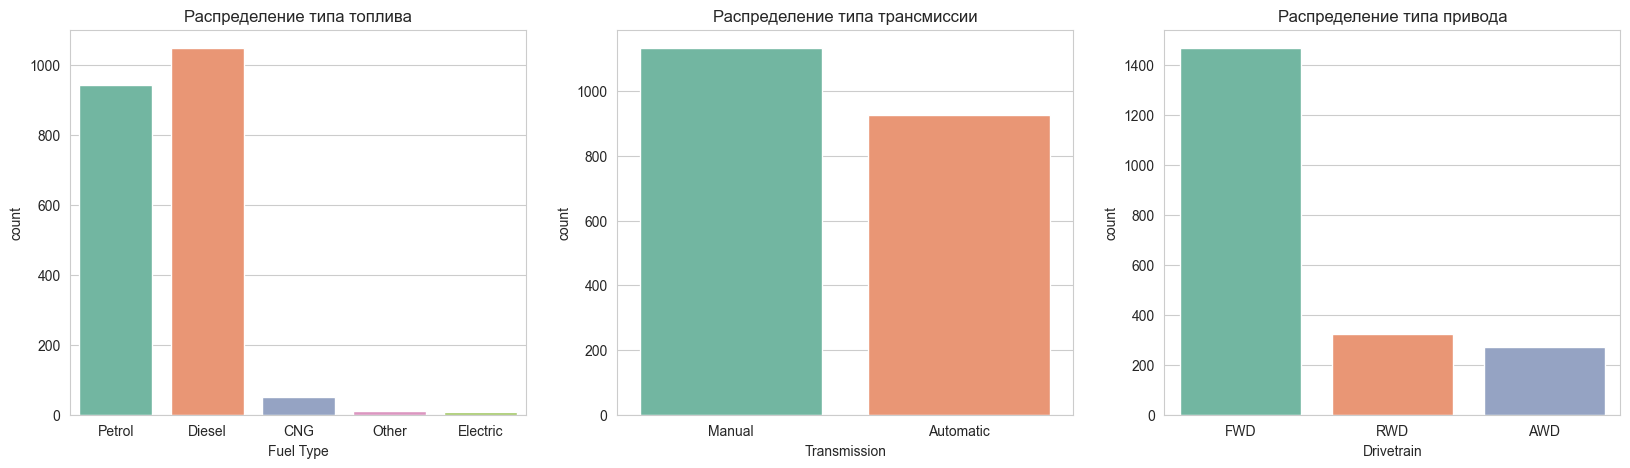

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

df_fuel = df.copy()
df_fuel['Fuel Type'] = df_fuel['Fuel Type'].apply(
    lambda x: x if x in ['Petrol', 'Diesel', 'CNG', 'Electric'] else 'Other')

sns.countplot(x='Fuel Type', data=df_fuel, ax=axes[0], palette='Set2')
axes[0].set_title('Распределение типа топлива')

sns.countplot(x='Transmission', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Распределение типа трансмиссии')

sns.countplot(x='Drivetrain', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Распределение типа привода')

plt.show()

Большинство автомобилей работают на дизеле, хотя бензиновых также много. Небольшую, но заметную долю занимают автомобили на сжиженном газе. Электромобили встречаются крайне редко.

Большинство автомобилей имеют механическую трансмиссию, хотя автоматических коробок не сильно меньше.

Большинство автомобилей имеют передний привод, RWD и AWD сильно меньше и примерно поровну.

### 8.3. Количество выпущенных автомобилей в зависимости от года выпуска и трансмиссии

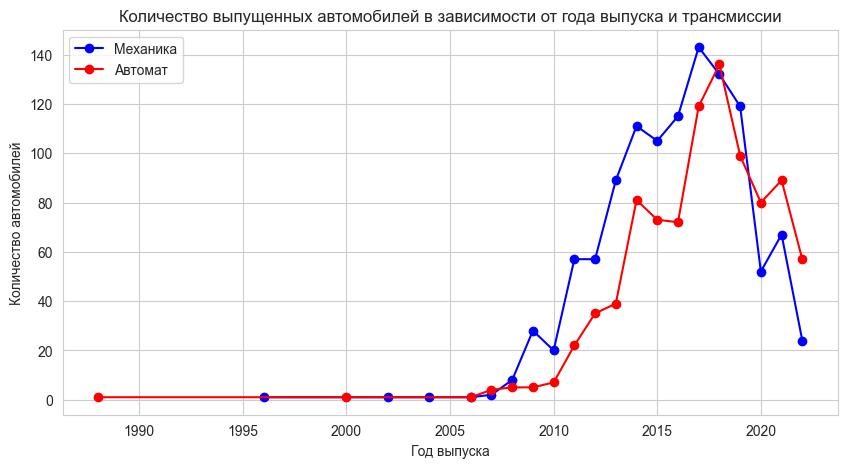

In [98]:
df_manual = df[df['Transmission'] == 'Manual']
df_automatic = df[df['Transmission'] == 'Automatic']

year_count_manual = df_manual.groupby("Year")["Transmission"].count()
year_count_automatic = df_automatic.groupby("Year")["Transmission"].count()

plt.figure(figsize=(10, 5))
plt.plot(year_count_manual.index, year_count_manual.values, marker="o", linestyle="-", color="b", label="Механика")
plt.plot(year_count_automatic.index, year_count_automatic.values, marker="o", linestyle="-", color="r", label="Автомат")

plt.xlabel("Год выпуска")
plt.ylabel("Количество автомобилей")
plt.title("Количество выпущенных автомобилей в зависимости от года выпуска и трансмиссии")
plt.legend()
plt.grid(True)

plt.show()

Заметим, что большинство новых авто работают на "автомате". При этом авто, выпущенные до 2017 года, были в основном на "механике".

### 8.4. Взаимосвязь цены и мощности двигателя

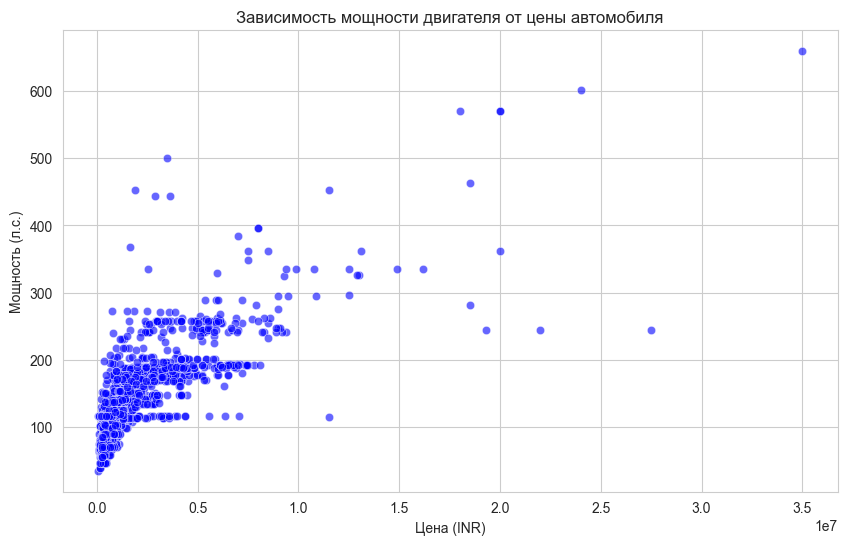

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price"], y=df["Max Power"], color="b", alpha=0.6)

plt.xlabel("Цена (INR)")
plt.ylabel("Мощность (л.с.)")
plt.title("Зависимость мощности двигателя от цены автомобиля")
plt.grid(True)

plt.show()

Хотя видна положительная корреляция между ценой и мощностью, среди машин средней ценовой категории (1-4 млн INR) найдутся такие, которые по мощности не хуже вариантов за 10-15 млн INR.

### 8.5. Взаимосвязь трансмиссии и топлива

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1439005237.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_is_manual['Is Manual'] = df_is_manual['Transmission'].replace({'Manual': 1, 'Automatic': 0})


<Axes: xlabel='Is Manual'>

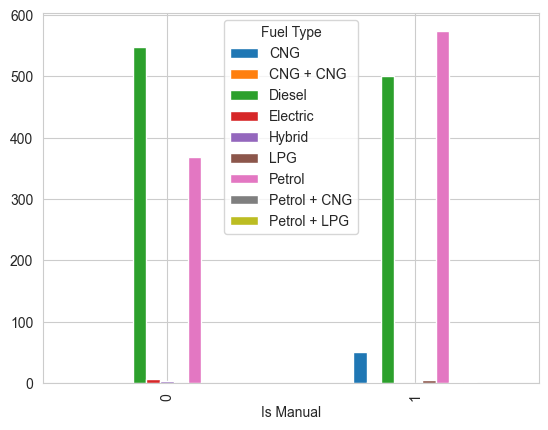

In [100]:
df_is_manual = df.copy()
df_is_manual['Is Manual'] = df_is_manual['Transmission'].replace({'Manual': 1, 'Automatic': 0})

ct = pd.crosstab(df_is_manual['Is Manual'], df_is_manual['Fuel Type'])
ct.plot.bar()

Результат достаточно неожиданный: среди автомобилей на "автомате" у большинства дизельный двигатель, хотя среди механических коробок бензиновых машин больше. Также стоит отметить, что среди автомобилей на сжиженном газе нет машин с автоматической коробкой.

# 9. Сводные таблицы

### 9.1. Средняя стоимость машины каждого бренда в зависимости от состояния автомобиля (новая, почти новая, б/у)

In [101]:
pd.options.display.float_format = '{:,.2f}'.format

pd.pivot_table(df, index='Make', columns='Kilometer Category', values='Price', aggfunc='mean', fill_value=0)

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1469911693.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index='Make', columns='Kilometer Category', values='Price', aggfunc='mean', fill_value=0)


Kilometer Category,New,Almost New,Used
Make,,,
Audi,"4,901,000.00","6,216,666.67","2,580,704.90"
BMW,0.00,"5,687,857.14","3,651,140.33"
Chevrolet,0.00,0.00,"341,285.57"
Datsun,0.00,"425,000.00","279,714.29"
Ferrari,0.00,"35,000,000.00",0.00
Fiat,0.00,0.00,"305,000.00"
Ford,0.00,"3,975,000.00","1,421,425.51"
Honda,"700,000.00","1,226,750.00","589,120.78"
Hyundai,0.00,"1,272,049.90","689,902.66"


Можно заметить, что в датасете оказалось мало новых машин. Как ни странно, *новые* машины некоторого бренда не всегда дороже *почти новых* машин это же бренда. В любом случае, таких машин слишком мало, чтобы делать содержательные выводы.

При этом, как и ожидалось, почти новые машины дороже, чем б/у. Разница сильнее всего у премиум-брендов:

- Mercedes-Benz: машина с пробегом меньше 10000 км в среднем стоит в 7,250,000 INR, а машина с пробегом больше 10000 км - 3,800,000 INR
- Porsche: машина с пробегом меньше 10000 км в среднем стоит в 11,500,000 INR, а машина с пробегом больше 10000 км - 6,200,000 INR

**Хи-квадрат**

К данной таблице не применим хи-квадрат, так как она не содержит информации о частоте встречаемости тех или иных значений.

### 9.2. Количество машин в зависимости от трансмиссии и привода

In [102]:
pd.pivot_table(df, index='Transmission', columns='Drivetrain', values='Price', aggfunc='count', fill_value=0)

Drivetrain,AWD,FWD,RWD
Transmission,,,
Automatic,238,465,223
Manual,34,1001,98


Подавляющее большинство машин на механике имеют передний привод. Среди автомобилей на автомате также больше машин с передним приводом, но разница меньше.

**Хи-квадрат**

In [103]:
pivot = pd.pivot_table(df, index='Transmission', columns='Drivetrain', values='Price', aggfunc='count', fill_value=0)

test = stats.chi2_contingency(pivot)
print('chi2 = ', test[0], '   p-value =', test[1])

chi2 =  380.68578164487224    p-value = 2.1633801787076446e-83


p-value < 0.05, поэтому выводы, сделанные по таблице, можно считать статистически значимыми.

### 9.3. Количество проданных машин в зависимости от вида топлива для каждого года изготовления, начиная с 2010

In [104]:
df_since_2010 = df[df['Year'] >= 2010]
df_since_2010 = df_since_2010[df_since_2010['Fuel Type'].isin(['Petrol', 'Diesel'])]

pd.pivot_table(df_since_2010, index='Fuel Type', columns='Year', values='Price', aggfunc='count', fill_value=0)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Fuel Type,,,,,,,,,,,,,
Diesel,8,25,50,77,111,101,113,140,151,105,67,58,29
Petrol,19,50,40,47,75,69,72,117,115,103,58,88,49


Можно сделать такие выводы:

- Из машин 2010-2011 года выпуска большинство работают на бензине.
- Из машин 2012-2020 года выпуска большинство работают на дизеле.
- Из машин 2021-2022 года выпуска большинство работают на бензине.

**Хи-квадрат**

In [105]:
pivot = pd.pivot_table(df_since_2010, index='Fuel Type', columns='Year', values='Price', aggfunc='count', fill_value=0)

test = stats.chi2_contingency(pivot)
print('chi2 = ', test[0], '   p-value =', test[1])

chi2 =  53.271102275453075    p-value = 3.6861787780201744e-07


p-value < 0.05, поэтому выводы, сделанные по таблице, можно считать статистически значимыми.

# 10. Центральная тенденция

Рассмотрим центральные тенденции для:

1) Номинальных переменных
2) Порядковых переменных
3) Метрических переменных
4) Отдельных групп наблюдений

### 10.1. Тенденция для номинальных переменных

Посмотрим на моды для каждой переменной.

In [106]:
df_nominal = df[['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Drivetrain', 'Kilometer Category']]

description = df_nominal.describe()

# Также получим информацию, сколько раз встречается каждое значение в соотношении с общим количеством значений
description.loc['proportion'] = description.loc['freq'] / description.loc['count']

description

,Make,Model,Fuel Type,Transmission,Location,Color,Seller Type,Drivetrain,Kilometer Category
count,2059,2059,2059,2059,2059,2059,2059,2059,2059
unique,33,1050,9,2,77,17,3,3,3
top,Maruti Suzuki,X1 sDrive20d xLine,Diesel,Manual,Mumbai,White,Individual,FWD,Used
freq,440,15,1049,1133,342,802,1997,1466,1915
proportion,0.21,0.01,0.51,0.55,0.17,0.39,0.97,0.71,0.93


Мы получили моды для каждой переменной:

1) Самая популярная марка - Maruti Suzuki (21% из всех авто).
2) Самая популярная модель - X1 sDrive20d xLine (таких 0.1%), как ни странно, это BMW. Хотя кажется, что самая популярная модель должна быть от Maruti Suzuki, это не так. Это связано с тем, что у этой марки много разных моделей, причем две похожие машины могут называться по-разному в зависимости от опций и года выпуска.
3) Самый популярный тип топлива - дизель (51%). Видимо это связано с ценами на бензин в Индии, так как в большинстве стран бензиновые машины популярнее.
4) Самый популярный тип трансмиссии - механическая (55%). Это связано с преобладанием авто бюджетного сегмента.
5) Самый популярный город продажи - Мумбаи (17%). Достаточно ожидаемо, так как это крупнейший город Индии.
6) Самый популярный цвет - белый (39%). Вероятно, этот цвет лучше подходит для жаркого климата, машина медленнее нагревается на солнце.
7) Самый популярный тип продавца - физическое лицо (97%). Вероятно, это связано с тем, что достаточно просто самостоятельно продать машину, разместив объявление в интернете.
8) Самый популярный тип привода - передний (71%). Вероятно, это связано с тем, что передний привод дешевле и проще в обслуживании, чем задний или полный.
9) Самая популярная категория пробега - б/у с пробегом более 10 000 км (93%). Очевидно, что новых машин в продаже меньше, чем б/у.

### 10.2. Тенденция для порядковых переменных

Посмотрим на медиану, моду и квартильное отклонение для каждой переменной.

In [107]:
df_ordinal = df[['Year', 'Owner']]

# Calculate the median and mode for the 'Year' and 'Owner' columns
median_year = df_ordinal['Year'].median()
mode_year = df_ordinal['Year'].mode()[0]
proportion_mode_year = len(df_ordinal[df_ordinal['Year'] == mode_year]) / len(df_ordinal['Year'])

median_owner = df_ordinal['Owner'].median()
mode_owner = df_ordinal['Owner'].mode()[0]
proportion_mode_owner = len(df_ordinal[df_ordinal['Owner'] == mode_owner]) / len(df_ordinal['Owner'])

# Calculate quartile deviation for 'Year' and 'Owner'
q1_year = df_ordinal['Year'].quantile(0.25)
q3_year = df_ordinal['Year'].quantile(0.75)
quartile_deviation_year = (q3_year - q1_year) / 2

q1_owner = df_ordinal['Owner'].quantile(0.25)
q3_owner = df_ordinal['Owner'].quantile(0.75)
quartile_deviation_owner = (q3_owner - q1_owner) / 2

# Create the summary DataFrame
summary_df = pd.DataFrame({
    'Statistic': ['Median', 'Mode', 'Proportion of Mode', 'Quartile Deviation'],
    'Year': [median_year, mode_year, proportion_mode_year, quartile_deviation_year],
    'Owner': [median_owner, mode_owner, proportion_mode_owner, quartile_deviation_owner]
})

summary_df


,Statistic,Year,Owner
0,Median,"2,017.00",1.00
1,Mode,"2,018.00",1.00
2,Proportion of Mode,0.13,0.80
3,Quartile Deviation,2.50,0.00


Результаты для Year (год изготовления проданного авто):

1) Медиана - 2017 год.
2) Мода - 2018 год (13% всех авто).
3) Квартильное отклонение - 2.5 года.

Такой результат говорит о том, что многие проданные авто не старше 5 лет (учитывая, что датасет актуален на 2022 год). Получается, старые машины продают не так активно.

Результаты для Owner (количество владельцев):

1) Медиана - 1 владелец.
2) Мода - 1 владелец (80% всех авто).
3) Квартильное отклонение - 0 (связано с тем, что квантили уровня 0,25 и 0,75 равны)

Такой результат говорит о том, что подавляющее большинство машин продаются после первого владельца. Вероятно, это связано с тем, что машину с одним прошлым владельцем проще продать, так как она обычно в лучшем состоянии.

### 10.3. Тенденция для метрических переменных

Посмотрим на среднее, медиану, моду и стандартное отколнение для каждой переменной.

In [108]:
metric_vars = ['Price', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year']

df_metric = df[metric_vars]

data = {}

for var in metric_vars:
    data[var] = [df_metric[var].mean(), df_metric[var].median(), df_metric[var].mode()[0], df_metric[var].std()]

summary_df = pd.DataFrame(data, index=['Mean', 'Median', 'Mode', 'Std'])
summary_df

,Price,Kilometer,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Kilometer Per Year
Mean,"1,702,991.70","54,224.71","1,685.02",129.08,244.07,"4,283.63","1,768.05","1,590.28",5.30,51.89,"8,850.32"
Median,"825,000.00","50,000.00","1,498.00",116.00,200.00,"4,370.00","1,770.00","1,545.00",5.00,50.00,"7,777.78"
Mode,"425,000.00","65,000.00","1,197.00",89.00,200.00,"3,995.00","1,695.00","1,475.00",5.00,50.00,"6,000.00"
Std,"2,419,880.64","57,361.72",632.22,63.85,137.99,435.80,133.15,134.19,0.81,14.70,"8,827.48"


Результаты для Price (цена автомобиля):

1) Среднее - ~1,700,000 INR.
2) Медиана - 825,000 INR.
3) Мода - 425,000 INR.
4) Среднеквадратическое отклонение - ~2,420,000 INR.

Такой результат говорит о том, что большинство машин - в бюджетном ценовом сегменте (бюджетными буду считать машины до 1 млн INR). При этом средняя стоимость достаточно высока, что говорит о том, что в датасете есть очень дорогие авто, "искажающие" статистику. Также среднеквадратическое отклонение достаточно большое, что говорит о большом разбросе цен.

Результаты для Kilometer (пробег):

1) Среднее - ~54,000 км.
2) Медиана - 50,000 км.
3) Мода - 65,000 км.
4) Среднеквадратическое отклонение - ~57,360 км.

Такой результат говорит о том, что многие машины имеют пробег 50-60 км. При этом среднеквадратическое отклонение достаточно большое, что говорит о большом разбросе пробега.

Результаты для Engine (объем двигателя):

1) Среднее - ~1,685 см³.
2) Медиана - 1,495 см³.
3) Мода - 1,197 см³.
4) Среднеквадратическое отклонение - ~630 см³.

Такой результат говорит о том, что объем двигателя многих авто близок к 1,500 см³. При этом можно заметить, что мода - ~1,200 см³, что говорит о популярности некоторого экономного двигателя с таким объемом. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс объемов двигателей не очень велик.

Результаты для Max Power (мощность двигателя):

1) Среднее - ~129 л.с.
2) Медиана - 116 л.с.
3) Мода - 89 л.с.
4) Среднеквадратическое отклонение - ~64 л.с.

Такой результат говорит о том, что многие авто не очень мощные. При этом мода - 89 л.с., что говорит о популярности некоторого авто с такой мощностью. Среднеквадратическое отклонение ощутимое по сравнению со средним, что говорит о значительном разбросе мощности двигателей, хотя не слишком большом.

Результаты для Max Torque (крутящий момент):

1) Среднее - ~244 Нм.
2) Медиана - 200 Нм.
3) Мода - 200 Нм.
4) Среднеквадратическое отклонение - ~138 Нм.

Такой результат говорит о том, что многие авто не очень мощные, хотя 200 Нм - не слишком плохой показатель. Среднеквадратическое отклонение ощутимое по сравнению со средним, что говорит о значительном разбросе крутящего момента, хотя не слишком большом.

Результаты для Length (длина автомобиля):

1) Среднее - ~4,280 мм.
2) Медиана - 4,370 мм.
3) Мода - 3,995 мм.
4) Среднеквадратическое отклонение - ~440 мм.

Можно сделать вывод, что среди проданных авто много как длинных авто вроде седанов (от 4,500 мм), так и средне-размерных авто вроде хэтчбеков и внедорожников (от 4,000 мм). Также, судя по статистикам, компактные авто (до 4,000 мм) встречаются редко. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс длин авто не очень велик.

Результаты для Width (ширина автомобиля):

1) Среднее - ~1,768 мм.
2) Медиана - 1,770 мм.
3) Мода - 1,695 мм.
4) Среднеквадратическое отклонение - ~133 мм.

Это говорит о том, что в основном ширина авто стандартная и чаще всего встречается в диапазоне 1,700-1,800 мм. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс ширины авто не очень велик.

Результаты для Height (высота автомобиля):

1) Среднее - ~1,590 мм.
2) Медиана - 1,545 мм.
3) Мода - 1,475 мм.
4) Среднеквадратическое отклонение - ~134 мм.

Можно сделать вывод, что в датасете много как высоких внеодорожников и микроавтобусов (от 1,600 мм), так и низких авто (до 1,500 мм). Встречаются и средние авто (1,500-1,600 мм). При этом мода - 1,475 мм, что говорит о популярности некоторого невысокого авто. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс высот авто не очень велик.

Результаты для Seating Capacity (количество мест для посадки):

1) Среднее - 5.3 мест.
2) Медиана - 5 мест.
3) Мода - 5 мест.
4) Среднеквадратическое отклонение - ~0.8 мест.

Достаточно ожидаемый результат, так как большинство авто имеют 5 мест для посадки. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс количества мест для посадки не очень велик.

Результаты для Fuel Tank Capacity (вместимость бензобака):

1) Среднее - ~52 л.
2) Медиана - 50 л.
3) Мода - 50 л.
4) Среднеквадратическое отклонение - ~14.7 л.

50 л. - стандартный объем для "среднего", авто, не большого и не маленького. Резултат вполне ожидаемый. Среднеквадратическое отклонение не очень большое, что говорит о том, что разброс вместимости бензобаков не очень велик.

Результаты для Kilometer Per Year (пробег в год):

1) Среднее - ~8,850 км.
2) Медиана - ~7,777 км.
3) Мода - 6,000 км.
4) Среднеквадратическое отклонение - ~8,830 км.

Можно сделать вывод, что многие авто проезжают около 8,000 км в год. При этом мода не имеет особого смысла, так как у многих авто пробег указан с точностью до 100 метров. Среднеквадратическое отклонение ощутимое по сравнению со средним, что говорит о значительном разбросе пробега в год.

### 10.4. Тенденция по группам наблюдений

Расмотрю несколько групп наблюдений: **мощность по типу топлива** и **цена по типу привода**.

Оценю среднее, медиану, моду и стандартное отклонение для каждой группы.

**Мощность по типу топлива**:

По графику из пункта 8.5 видно, что среди видов топлива популярны Petrol, Diesel и CNG (сжиженный газ). Посмотрим на среднюю мощность двигателя для каждого из них и для других (объединим остальные в Other)

In [109]:
df_fuel_power = df[['Fuel Type', 'Max Power']]
df_fuel_power['Fuel Type'] = df_fuel_power['Fuel Type'].apply(
    lambda x: x if x in ['Petrol', 'Diesel', 'CNG'] else 'Other')

mean_values = df_fuel_power.groupby('Fuel Type')['Max Power'].mean()
median_values = df_fuel_power.groupby('Fuel Type')['Max Power'].median()
mode_values = df_fuel_power.groupby('Fuel Type')['Max Power'].agg(lambda x: x.mode()[0])
std_values = df_fuel_power.groupby('Fuel Type')['Max Power'].std()

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Std': std_values
})

summary_df

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\160380763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuel_power['Fuel Type'] = df_fuel_power['Fuel Type'].apply(


,Mean,Median,Mode,Std
Fuel Type,,,,
CNG,60.12,58.00,58.00,11.49
Diesel,145.89,140.00,89.00,53.06
Other,100.33,116.00,116.00,39.79
Petrol,114.57,89.00,67.00,70.37


Выводы про мощность двигателя в зависимости от типа топлива:

1) Авто на газе (CNG) значительно менее мощные, чем остальные (в среднем 60 л.с.), при этом разброс мощности у них очень маленький. Получается, таким авто характерны экономичные двигатели.
2) Самые мощные авто - на дизеле (в среднем 145 л.с.), при этом разброс мощности у них вполне ощутимый. Получается, что дизельные авто чаще всего бывают мощными, хотя бывают и исключения.
3) Самый сильный разброс мощности - у авто на бензине. Это можно связать с тем, что самые мощные авто в выборке работают именно на бензине (среди них Ferrari, Porsche, Rolls-Royce и т.д.), но при этом на бензине есть и экономичные авто. "Выбросы" в виде дорогих авто объясняют, почему среднее значение мощности у бензиновых авто ощутимо выше, чем медианное.
4) Остальные авто (не на бензине, дизеле и газе) в среднем имеют мощность 100 л.с., что говорит о том, что они в среднем не очень мощные. Разброс мощности у них вполне ощутимый, но не очень большой.

**Цена по типу привода**:

In [110]:
df_drivetrain_price = df[['Drivetrain', 'Price']]

mean_values = df_drivetrain_price.groupby('Drivetrain')['Price'].mean()
median_values = df_drivetrain_price.groupby('Drivetrain')['Price'].median()
mode_values = df_drivetrain_price.groupby('Drivetrain')['Price'].agg(lambda x: x.mode()[0])
std_values = df_drivetrain_price.groupby('Drivetrain')['Price'].std()

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Std': std_values
})

summary_df

,Mean,Median,Mode,Std
Drivetrain,,,,
AWD,"4,292,919.10","3,450,000.00",4200000,"3,634,553.61"
FWD,"904,919.45","625,000.00",425000,"857,643.46"
RWD,"3,153,190.00","2,225,000.00",850000,"3,518,025.84"


Выводы про цену автомобиля в зависимости от типа привода:

1) Самые дорогие авто - с полным приводом (в среднем ~4,290,000 INR), при этом разброс цен у них очень сильный. Медианная цена также высокая - 3,450,000 INR. Это свидетельствует о том, что многие авто с полным приводом относятся к комфорт-классу, хотя среди них есть и более экономные, и люксовые автомобили.
2) Самые дешевые авто - с передним приводом (в среднем ~900,000 INR). При этом медианное значение еще меньше - 625,000 IRN. Разброс цен у них также меньше, чем у других, что говорит о том, что передний привод характерен для бюджетных авто.
3) Авто с задним приводом в среднем примерно на миллион IRN дешевле, чем с полным приводом, но разброс также очень большой. Это связано с тем, что многие представительские авто (например, некоторые модели Mercedes-Benz, BMW и Toyota) имеют задний привод, но полный привод все-таки ценится больше.

# 11. Корреляция между числовыми данными.

#### Гипотезы:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не коррелируют между собой.
- Альтернативная гипотеза (H₁):
H₁: переменные коррелируют между собой.

Для начала построим хит-мап, чтобы всецело оценить ситуацию.


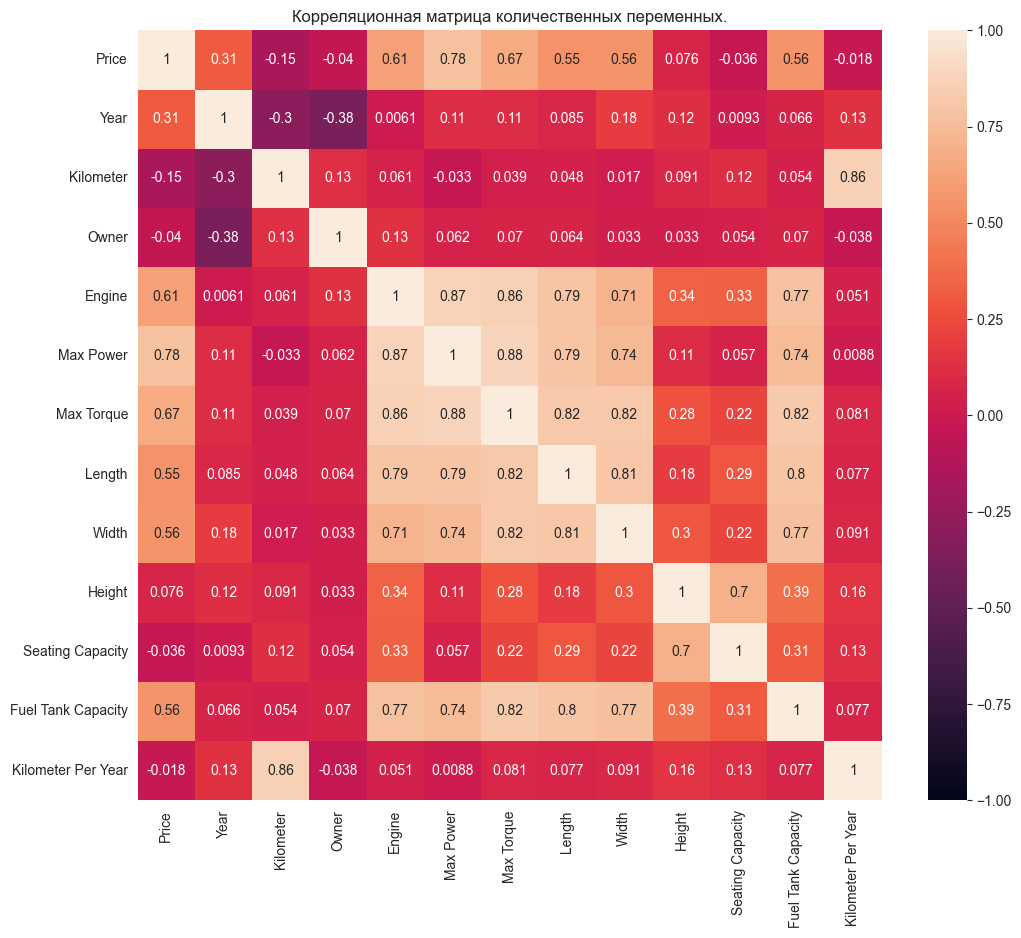

In [179]:
quantity_columns_list = df.select_dtypes(include=[np.number]).columns.tolist()
df_quantity_columns = df[quantity_columns_list]
corr_matrix = df_quantity_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title("Корреляционная матрица количественных переменных.")
plt.show()

Построим дополнительные хит-мапы, которые помогут оценить переменные для их выбора в модель, а после опишем всё вместе.

Text(0.5, 1.0, 'Корреляция переменных с ценой (Price)')

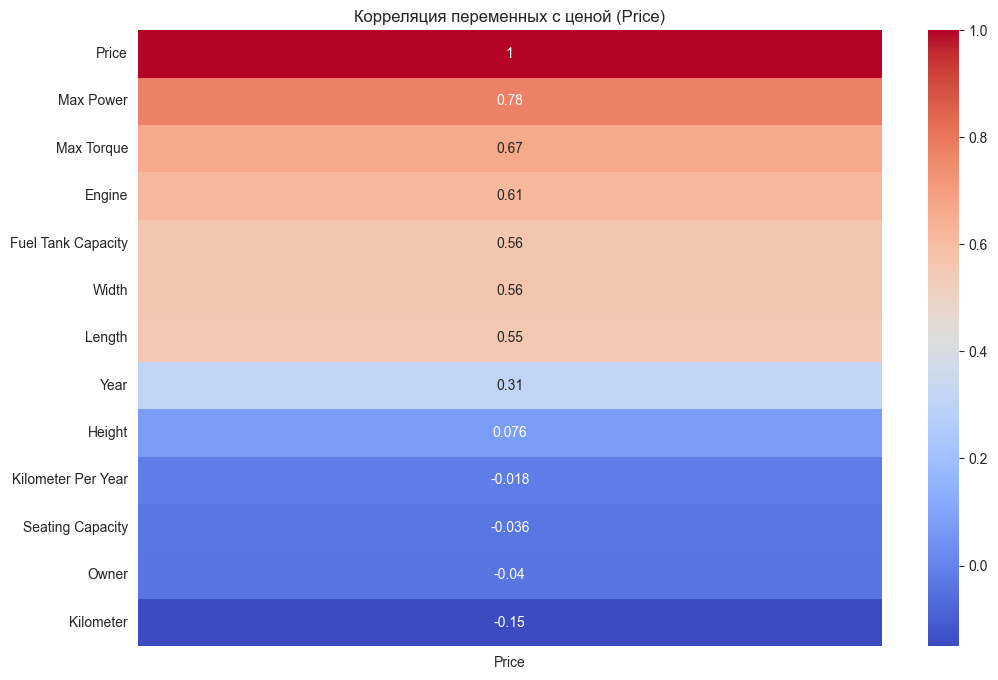

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Корреляция переменных с ценой (Price)")

Как мы можем заметить, большее влияние на цену автомобиля оказывает мощность двигателя, крутящий момент и его объём. Можем сделать вывод что эти три переменные высококоррелируют между собой. Проверим это:

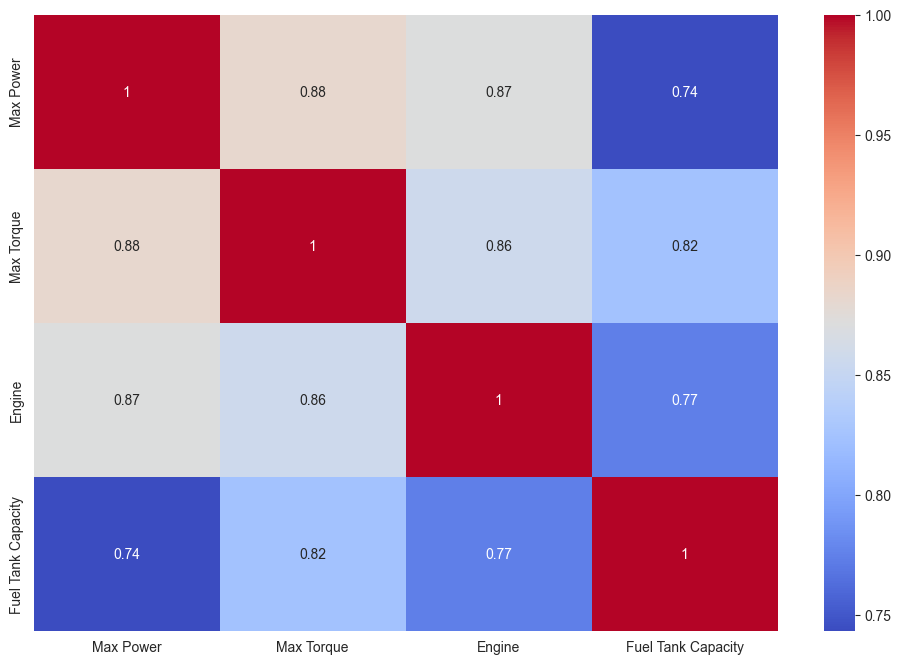

In [113]:
df_engine_columns = df_quantity_columns[['Max Power', 'Max Torque', 'Engine', 'Fuel Tank Capacity']]
corr_matrix = df_engine_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Как мы и предполагали эти переменные высоко коррелируют между собой. Действительно, странно если у мощного двигателя будет совсем небольшой крутящий момент. Отвергается гипотеза H₀ для переменных Max Power, Max Torque, Engine, Fuel Tank Capacity.

Теперь проверим корреляцию переменных между собой, которые связаны с габаритами автомобиля. Это его длина, ширина, кол-во мест для посадки и высота.

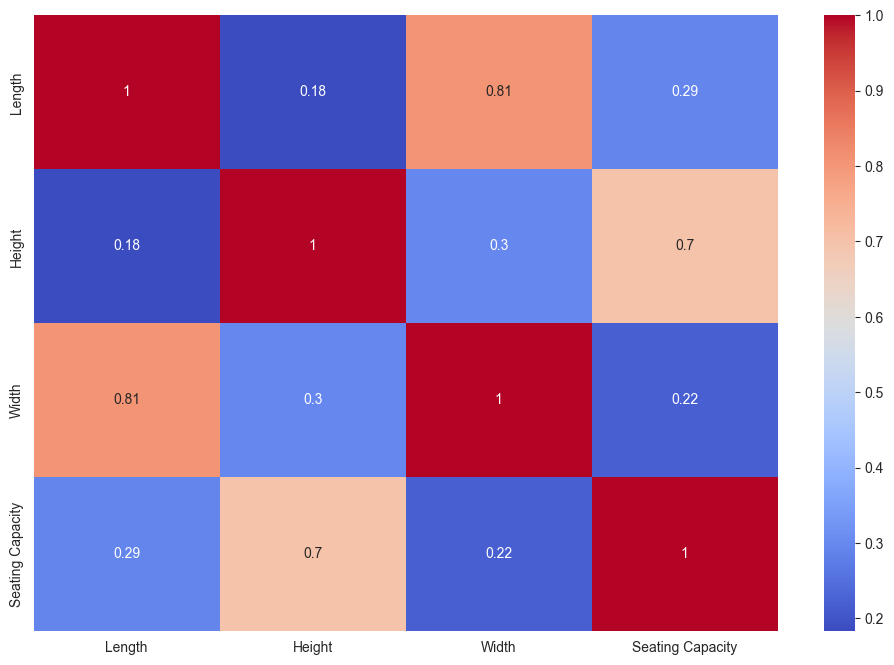

In [114]:
df_car_dimensions = df_quantity_columns[['Length', 'Height', 'Width', 'Seating Capacity']]
corr_matrix = df_car_dimensions.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Очевидна сильная положительная корреляция только у длины автомобиля с его шириной. А также, интересно то, что кол-во посадочных мест в большинстве своём зависит от высоты автомобиля, а не от длины или ширины. Вероятно, это связано с тем, что высокие внедорожники рассчитаны на больше количество мест. Таким образом для переменных Width, Height отвергается гипотеза H₀, аналогично для Width и Length.

# 12. Модель линейной регрессии.
Построим модель линейной регресии. Возьмем за зависимую переменную цену автомобиля - Price.

Для начала отберем предикторы. Будем использовать в модели не только метрические переменные. Категориальные выберем Drivetrain и Transmission, так как у них приемлемое кол-во уникальных значений, и учтем референтную группу (но для начала их нужно перекодировать, чем мы и займемся в ближайших кусках кода)

<Axes: >

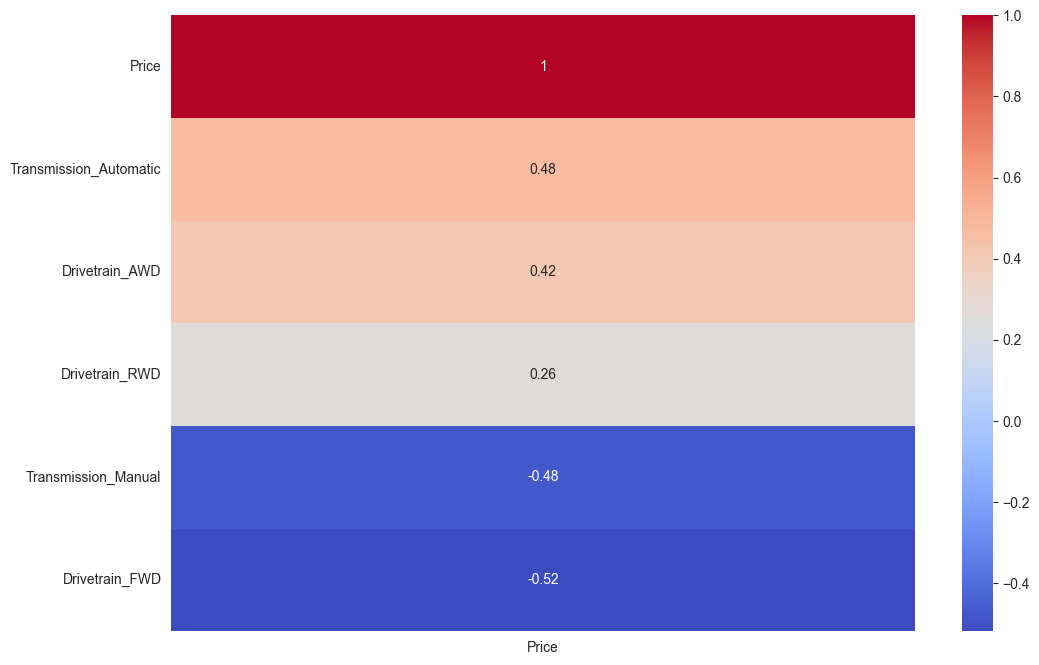

In [115]:
fuel_type_dummies = pd.get_dummies(df['Drivetrain'], prefix='Drivetrain', dtype=np.float64)
transmission_dummies = pd.get_dummies(df['Transmission'], prefix='Transmission', dtype=np.float64)
df_dummies = pd.concat([df[['Price']],fuel_type_dummies, transmission_dummies], axis=1)

correlation_matrix = df_dummies.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')


Почти каждая из переменных имеет весомую корреляцию с ценой. Пусть референтные группы будут Transmition_Manual и Drivetrain_FWD. То есть модель будет показывать, насколько смещается цена, относительно некомфортных автомобилей.

В коде выше мы рассмотрели корреляции количественных переменных. В итоге оставим в модели 6 предикторов:
- Max Power
- Width
- Year
- Kilometer
- Drivetrain
- Transmission

Они были отобраны с учетом отсутствия мультиколлинеарности. Теперь построим завершающий хит-мап, чтобы окончательно оценить подбор.


<Axes: >

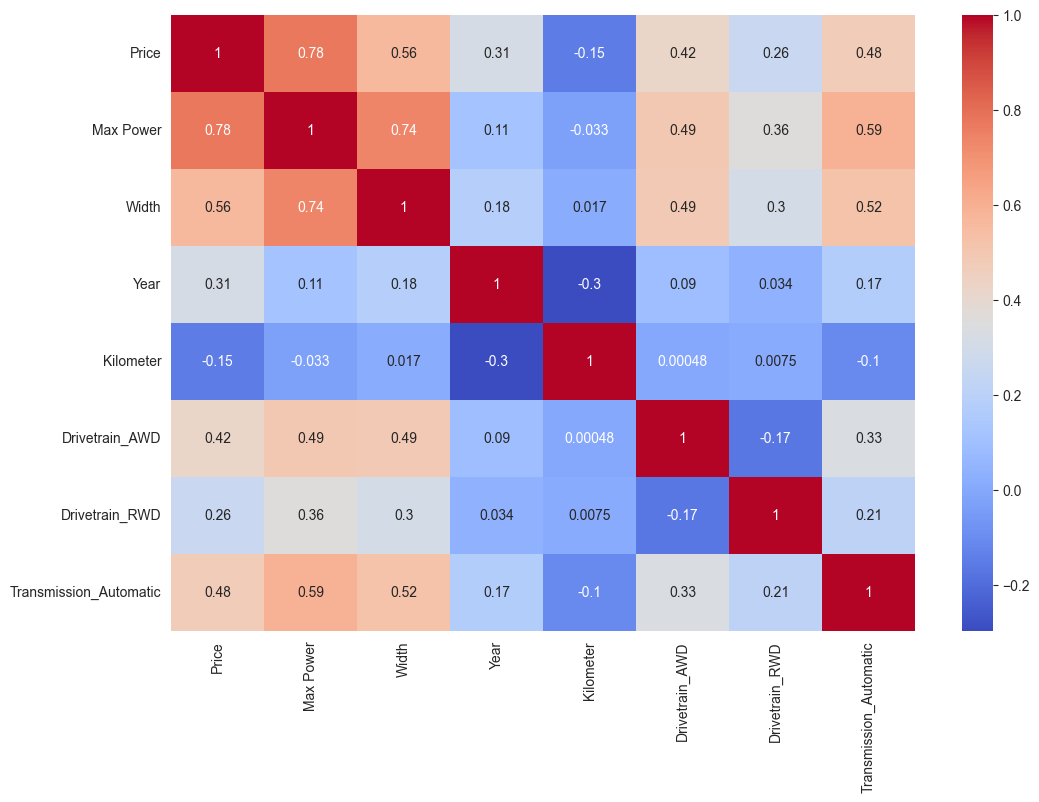

In [116]:
df_linear = pd.concat([df_quantity_columns[['Price', 'Max Power', 'Width', 'Year', 'Kilometer']], df_dummies[['Drivetrain_AWD', 'Drivetrain_RWD', 'Transmission_Automatic']]], axis=1)
correlation_matrix = df_linear.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Как мы можем видеть, проблема мультиколлиниераности отсутствует. Максимальная корреляция на уровне 0.74, что близко к норме.

#### Гипотезы:
- Основная гипотеза (H₀): переменные Max Power, Width, Year, Kilometer, Drivetrain_AWD, Drivetrain_RWD, Transmission_Automatic не имеют статистически значимого влияния на цену автомобиля.
- Альтернативная гипотеза (H₁): переменные имеют статистически значимое влияние на цену автомобиля.
#### Также для каждой независимой переменной можно также выдвинуть следующие частные гипотезы:
- H₀: Max Power не влияет на цену автомобиля.
- H₁: Max Power влияет на цену автомобиля.
- H₀: Width не влияет на цену автомобиля.
- H₁: Width влияет на цену автомобиля.
- H₀: Year не влияет на цену автомобиля.
- H₁: Year влияет на цену автомобиля.
- H₀: Kilometer не влияет на цену автомобиля.
- H₁: Kilometer влияет на цену автомобиля.
- H₀: Drivetrain_AWD не влияет на цену автомобиля.
- H₁: Drivetrain_AWD влияет на цену автомобиля.
- H₀: Drivetrain_RWD не влияет на цену автомобиля.
- H₁: Drivetrain_RWD влияет на цену автомобиля.
- H₀: Transmission_Automatic не влияет на цену автомобиля.
- H₁: Transmission_Automatic влияет на цену автомобиля.

### Построим модель!

In [117]:
import statsmodels.api as sm
df_model = df_linear.dropna(subset=['Price', 'Max Power', 'Width', 'Year', 'Kilometer', 'Drivetrain_AWD', 'Drivetrain_RWD', 'Transmission_Automatic'])
x_mult = df_model[['Max Power', 'Width', 'Year', 'Kilometer', 'Drivetrain_AWD', 'Drivetrain_RWD', 'Transmission_Automatic']]
y = df_model['Price']
x_mult_const = sm.add_constant(x_mult)
model = sm.OLS(y, x_mult_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:29:25   Log-Likelihood:                -32074.
No. Observations:                2059   AIC:                         6.416e+04
Df Residuals:                    2051   BIC:                         6.421e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.12

In [118]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.660590
F-test significance = 0.000000


Мы получили R^2 = 0.66. Это означает что модель статистически значима, и объясняет более 66% изменчивости значений зависимой переменной.

In [119]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


new_pvals = pd.DataFrame()
new_pvals['p_values'] = model.pvalues[1:]
new_pvals['5% level']= new_pvals['p_values'].apply(yes_no)
new_pvals['p_values'] = new_pvals['p_values'].map('{:.3f}'.format)
new_pvals['Features'] = model.params.index[1:]
new_pvals.set_index('Features',inplace=True)
new_pvals

,p_values,5% level
Features,,
Max Power,0.000,significant
Width,0.000,significant
Year,0.000,significant
Kilometer,0.000,significant
Drivetrain_AWD,0.001,significant
Drivetrain_RWD,0.680,non-significant
Transmission_Automatic,0.607,non-significant


Переменные Drivetrain_RWD и Transmission_Automatic оказались статистически незначимыми (очень большой p-value). Построим модель без этих переменных.

In [120]:
import statsmodels.api as sm
df_model = df_linear.dropna(subset=['Price', 'Max Power', 'Width', 'Year', 'Kilometer', 'Drivetrain_AWD'])
x_mult = df_model[['Max Power', 'Width', 'Year', 'Kilometer', 'Drivetrain_AWD']]
y = df_model['Price']
x_mult_const = sm.add_constant(x_mult)
model = sm.OLS(y, x_mult_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     798.9
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:29:26   Log-Likelihood:                -32075.
No. Observations:                2059   AIC:                         6.416e+04
Df Residuals:                    2053   BIC:                         6.419e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.113e+08   1.99e+07    -15.

In [121]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.660519
F-test significance = 0.000000


#### Изменение референтной группы

Учитывая, что модель теперь учитывает только переменную Drivetrain_AWD из группы переменных Drivetrain, референтной группой становится группа **переднеприводных и заднеприводных автомобилей**

### Уравнение регрессии

In [122]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('Y = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

Y = -311344266.054035 + 29985.13*Max Power + -1649.59*Width + 154818.91*Year + -2.51*Kilometer + 366976.88*Drivetrain_AWD


C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3904205700.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Y = {:2f} + {}'.format(model.params[0], ' + '.join(l)))


### Интерпретация значений коэффицентов регрессии

- При увеличении мощности на одну л. с., цена машины вырастает на 29 985 рупий.
- При увеличении ширины автомобиля на мм, цена машины падает на 1 649 рупий.
- Чем новее машина, тем она дороже. При увеличении года выпуска, цена вырастает на 154 818 рупий.
- Каждый километр пробега снижает цену на 2.5 рупии.
- Полный привод прибавляет к цене 366 976 рупии относительно переднего или заднего привода.
- Задний привод статистически не значим.
- Наличие автоматической трансмиссии статистически не значимо.

#### Диагностика модели
##### Остатки

In [123]:
from scipy import stats
p = stats.kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\866006874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, fit=stats.norm)


<Axes: ylabel='Density'>

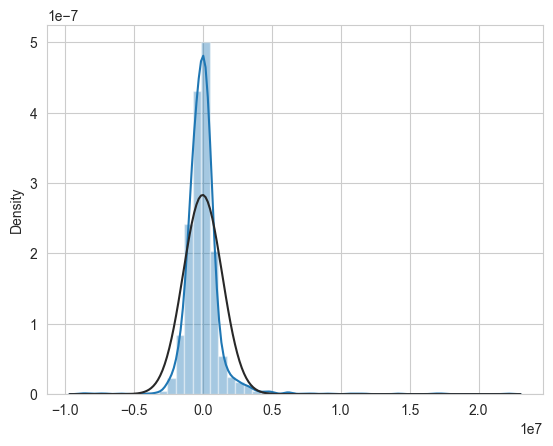

In [124]:
sns.distplot(model.resid, fit=stats.norm)

Распределение отличается от нормального, однако, судя по графику, оно близко к нему. Мат ожидание близко к нулю, но дисперсия поменьше.

#### Выбросы и влияющие наблюдения

In [125]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Max Power,dfb_Width,dfb_Year,dfb_Kilometer,dfb_Drivetrain_AWD,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.03,0.00,-0.00,-0.03,-0.00
1,0.01,-0.01,0.00,-0.01,0.00,0.00,0.00,0.53,0.00,0.02,0.53,0.02
2,0.01,0.00,-0.01,-0.01,-0.00,0.00,0.00,0.46,0.00,0.02,0.46,0.02
3,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.06,0.00,0.00,0.06,0.00
4,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.27,0.00,-0.01,-0.27,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-0.00,0.01,-0.01,0.00,-0.01,0.01,0.00,-0.51,0.00,-0.02,-0.51,-0.02
2055,0.00,-0.00,-0.02,-0.00,0.01,0.01,0.00,0.66,0.00,0.03,0.66,0.03
2056,0.01,-0.01,0.00,-0.01,0.00,0.00,0.00,0.56,0.00,0.02,0.56,0.02
2057,-0.01,0.01,0.00,0.01,0.00,-0.01,0.00,0.57,0.00,0.02,0.57,0.02


In [126]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
# Потенциальные влияющие наблюдения

235    -1.10
582     1.08
510     1.30
1305    1.49
483     3.52
1125    6.52
Name: dffits, dtype: float64

In [127]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
# Потенциальные выбросы

235    -6.27
1768   -6.02
424    -5.43
214    -5.05
575    -4.23
977     3.10
1771    3.19
1370    3.40
1533    3.40
542     3.50
259     3.58
837     3.59
1369    4.43
1803    4.43
1246    4.49
442     4.49
1125    5.11
95      5.24
510     5.81
1154    6.43
1890    7.67
1912    8.27
1313   10.10
582    11.97
483    12.73
1305   15.73
Name: standard_resid, dtype: float64

Было найдено несколько потенциальных влияющих наблюдений и выбросов. Посмотрим, что это за модели автомобилей.

In [128]:
df_source[df_source.index.isin(inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values().index)]
# Информация о потенциальных влияющих наблюдениях

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
235,Porsche,Cayenne Turbo,3500000,2014,160000,Petrol,Automatic,Mumbai,Blue,First,Individual,4806 cc,500 bhp @ 6500 rpm,700 Nm @ 2250 rpm,AWD,"4,846.00","1,939.00","1,702.00",5.00,100.00
483,Ferrari,488 GTB,35000000,2018,9500,Petrol,Automatic,Delhi,Black,First,Individual,3902 cc,660 bhp @ 8000 rpm,760 Nm @ 3000 rpm,RWD,"4,568.00","1,952.00","1,213.00",2.00,78.00
510,Lamborghini,Huracan LP 610-4,24000000,2016,6000,Petrol,Automatic,Delhi,Blue,First,Individual,5204 cc,602 bhp @ 8250 rpm,560 Nm @ 6500 rpm,AWD,"4,459.00","1,924.00","1,165.00",2.00,NaN
582,Land Rover,Range Rover 3.0 V6 Diesel Vogue,22000000,2019,35000,Diesel,Automatic,Pune,Blue,First,Individual,2993 cc,244 bhp @ 4000 rpm,600 Nm @ 2000 rpm,AWD,"4,999.00","2,220.00","1,835.00",5.00,105.00
1125,Renault,Duster 110 PS RXZ 4X2 MT Diesel,450000,2016,2000000,Diesel,Manual,Ranchi,White,First,Individual,1461 cc,108 bhp @ 3900 rpm,248 Nm @ 2250 rpm,FWD,"4,315.00","1,822.00","1,695.00",5.00,50.00
1305,Land Rover,Range Rover 3.0 V6 Diesel Vogue LWB,27500000,2020,11000,Diesel,Automatic,Hyderabad,White,Second,Individual,2993 cc,244 bhp @ 4000 rpm,600 Nm @ 2000 rpm,AWD,"5,199.00","2,220.00","1,840.00",4.00,105.00


In [129]:
df_source[df_source.index.isin(inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values().index)]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
95,Porsche,Cayenne Coupe Platinum Edition,16200000,2022,2766,Petrol,Automatic,Mumbai,Blue,First,Individual,2995 cc,335 bhp @ 5300 rpm,450 Nm @ 1340 rpm,AWD,"4,931.00","1,983.00","1,676.00",4.00,75.00
214,Audi,RS5 4.2 Coupe,3650000,2012,25500,Petrol,Automatic,Mumbai,Blue,Second,Corporate,4163 cc,444 bhp @ 8250 rpm,430 Nm @ 4000 rpm,AWD,"4,649.00","1,860.00","1,366.00",5.00,64.00
235,Porsche,Cayenne Turbo,3500000,2014,160000,Petrol,Automatic,Mumbai,Blue,First,Individual,4806 cc,500 bhp @ 6500 rpm,700 Nm @ 2250 rpm,AWD,"4,846.00","1,939.00","1,702.00",5.00,100.00
259,Land Rover,Range Rover Sport SE 2.0 Petrol,12500000,2022,22010,Petrol,Automatic,Mohali,White,First,Individual,1997 cc,296 bhp @ 5500 rpm,400 Nm @ 1500 rpm,AWD,"4,879.00","2,073.00","1,803.00",5.00,104.00
424,Audi,RS5 4.2 Coupe,2900000,2011,56000,Petrol,Automatic,Pune,Red,Third,Individual,4163 cc,444 bhp @ 8250 rpm,430 Nm @ 4000 rpm,AWD,"4,649.00","1,860.00","1,366.00",5.00,64.00
442,Mercedes-Benz,S-Class Maybach S 560,18500000,2021,21000,Petrol,Automatic,Gurgaon,Black,First,Individual,3982 cc,463 bhp @ 5250 rpm,700 Nm @ 2000 rpm,RWD,"5,462.00","1,899.00","1,498.00",4.00,70.00
483,Ferrari,488 GTB,35000000,2018,9500,Petrol,Automatic,Delhi,Black,First,Individual,3902 cc,660 bhp @ 8000 rpm,760 Nm @ 3000 rpm,RWD,"4,568.00","1,952.00","1,213.00",2.00,78.00
510,Lamborghini,Huracan LP 610-4,24000000,2016,6000,Petrol,Automatic,Delhi,Blue,First,Individual,5204 cc,602 bhp @ 8250 rpm,560 Nm @ 6500 rpm,AWD,"4,459.00","1,924.00","1,165.00",2.00,NaN
542,Mercedes-Benz,GLS 400d 4MATIC,13000000,2021,20000,Diesel,Automatic,Delhi,Blue,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,"5,207.00","2,157.00","1,823.00",7.00,90.00
575,Mercedes-Benz,S-Class 500L,1650000,2012,44000,Petrol,Automatic,Mumbai,Silver,Third,Individual,5461 cc,368 bhp @ 6300 rpm,505 Nm @ 4400 rpm,RWD,"5,226.00","2,120.00","1,479.00",5.00,90.00


Мы видим необычные модели, которые могут исказить результаты модели.
- Выбросы по цене: так например Ferrari 488 GTB продана за 35000000 рупий и Lamborghini Huracan LP 610-4 за 24000000. Эти цены значительно выше, чем у большинства других автомобилей в датасете.
- По мощности: Ferrari 488 GTB имеет мощность 660 bhp, что значительно выше, чем у большинства других автомобилей.
- По пробегу: некоторые автомобили имеют очень низкий пробег, например, Mercedes-Benz GLS 400d 4MATIC с пробегом 3000 км и Toyota Vellfire Hybrid с пробегом 4000 км. С другой стороны, Renault Duster имеет пробег 2000000 км, что является крайне высоким значением.
- По году выпуска: например два Rolls-Royce Ghost, которые были выпущены более 12 лет назад, но при этом имеют цену 18000000 и 2000000 рупий соответственно.

Удалим выбросы и влияющие наблюдения из df_model и построим новую модель, чтобы проверить, насколько это улучшит результаты. Также уберем незначимую переменную.

In [130]:
emissions_set = set() # Множество индексов выбросов и влияющих наблюдений

emissions_set = emissions_set | set(df_source[df_source.index.isin(inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values().index)].index)

emissions_set = emissions_set | set(df_source[df_source.index.isin(inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values().index)].index)

emissions_set

{95,
 214,
 235,
 259,
 424,
 442,
 483,
 510,
 542,
 575,
 582,
 837,
 977,
 1125,
 1154,
 1246,
 1305,
 1313,
 1369,
 1370,
 1533,
 1768,
 1771,
 1803,
 1890,
 1912}

In [131]:
df_new_model = df_model.drop(list(emissions_set))
x_mult = df_new_model[['Max Power', 'Width', 'Year', 'Kilometer', 'Drivetrain_AWD']]
y = df_new_model['Price']
x_mult_const = sm.add_constant(x_mult)
new_model = sm.OLS(y, x_mult_const).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1185.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:29:29   Log-Likelihood:                -30724.
No. Observations:                2033   AIC:                         6.146e+04
Df Residuals:                    2027   BIC:                         6.149e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.499e+08   1.35e+07    -18.

In [132]:
print('R^2 = {:f}'.format(new_model.rsquared))
print('F-test significance = {:f}'.format(new_model.f_pvalue))

R^2 = 0.745144
F-test significance = 0.000000


Новая модель стала лучше! R^2 составил 0.745 против 0.66 у старой. Это значит что модель стала предсказывать на 8,5% точнее!

Запишем новое уравнение линейной регрессии.

In [133]:
l = []
for (param, index) in zip(new_model.params[1:], new_model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('Y = {:2f} + {}'.format(new_model.params[0], ' + '.join(l)))

Y = -249925536.384292 + 23937.96*Max Power + -733.97*Width + 123951.71*Year + -4.73*Kilometer + 506455.90*Drivetrain_AWD


C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1789853517.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Y = {:2f} + {}'.format(new_model.params[0], ' + '.join(l)))


In [134]:
new_pvals = pd.DataFrame()
new_pvals['p_values'] = new_model.pvalues[1:]
new_pvals['5% level']= new_pvals['p_values'].apply(yes_no)
new_pvals['p_values'] = new_pvals['p_values'].map('{:.3f}'.format)
new_pvals['Features'] = new_model.params.index[1:]
new_pvals.set_index('Features',inplace=True)
new_pvals

,p_values,5% level
Features,,
Max Power,0.000,significant
Width,0.003,significant
Year,0.000,significant
Kilometer,0.000,significant
Drivetrain_AWD,0.000,significant


Все переменные ожидаемо значимые.

P-value: 0.000


C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\699338945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_model.resid, fit=stats.norm)


<Axes: ylabel='Density'>

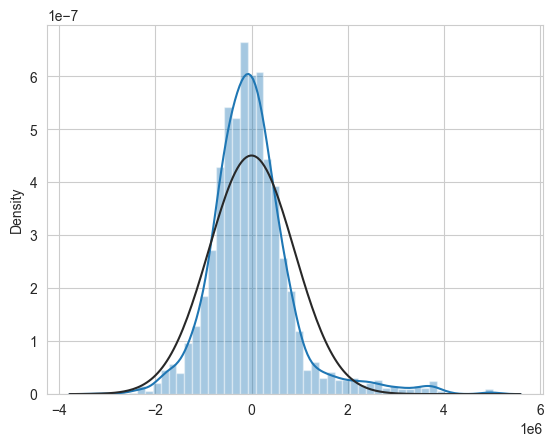

In [135]:
p = stats.kstest(new_model.resid, 'norm', args=(new_model.resid.mean(), new_model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))
sns.distplot(new_model.resid, fit=stats.norm)

Ситуация с остатками стала заметно лучше. Дисперсия увеличилась.

#### Гетероскедастичность
Выведем два графика, сначала для модели с выбросами, потом для новой.

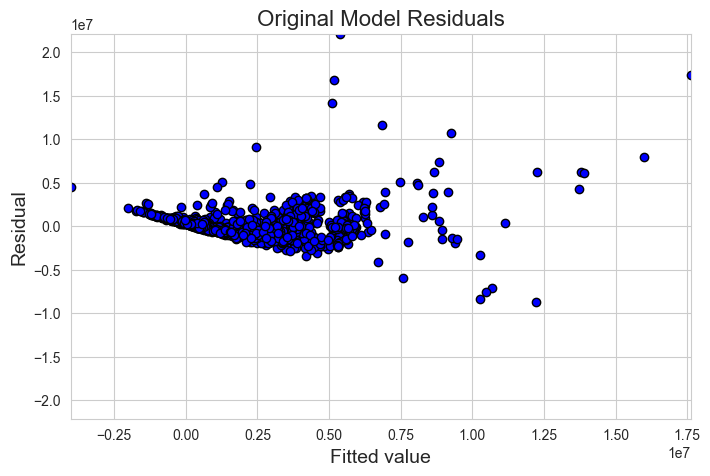

In [136]:
plt.figure(figsize=(8, 5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Original Model Residuals', fontsize=16)

plt.ylim(-max(abs(model.resid)), max(abs(model.resid)))
plt.xlim(min(model.fittedvalues), max(model.fittedvalues))

plt.show()

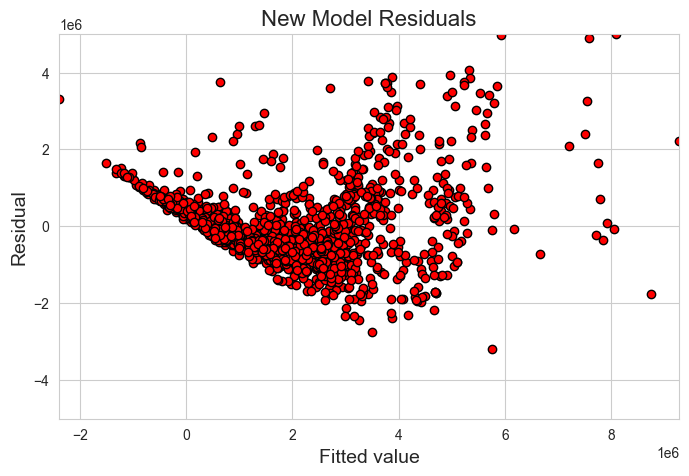

In [137]:
plt.figure(figsize=(8, 5))
plt.scatter(x=new_model.fittedvalues, y=new_model.resid, color='red', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('New Model Residuals', fontsize=16)

plt.ylim(-max(abs(new_model.resid)), max(abs(new_model.resid)))
plt.xlim(min(new_model.fittedvalues), max(new_model.fittedvalues))

plt.show()

В обоих случаях проблема гетероскедастичности существует. Однако удалив выбросы мы видим, что ситуация улучшилась. (~75% модель посчитала с небольшим разбросом).

#### Мультиколлинеарность

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [139]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [140]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
3,1.11,Kilometer
2,1.15,Year
4,1.39,Drivetrain_AWD
0,2.36,Max Power
1,2.40,Width


In [141]:
vifs = np.array([vif(new_model.model.exog, i) for i in range(new_model.model.exog.shape[1])])

vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = new_model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
3,1.27,Kilometer
2,1.31,Year
4,1.41,Drivetrain_AWD
1,2.77,Width
0,2.88,Max Power


В двух моделях нет значений VIF, которые превышают 10. Проблема мульти коллинеарности.

### Выводы по линейной регрессии.

### Выводы по модели с (R^2 = 66%)

1. **Качество модели**:
   - Модель объясняет 66% дисперсии целевой переменной цены автомобиля. Это означает, что выбранные предикторы (мощность, ширина, год выпуска, пробег, тип привода) достаточно хорошо описывают изменения цены.

2. **Интерпретация коэффициентов**:
   - Мощность (Max Power): Увеличение мощности на 1 л. с. приводит к росту цены на 29 985 рупий. Это ожидаемо, так как более мощные автомобили обычно дороже.
   - Ширина (Width): Увеличение ширины на 1 мм снижает цену на 1 649 рупий. Это может быть связано с тем, что более широкие автомобили менее популярны или менее практичны на рынке.
   - Год выпуска (Year): Более новые автомобили дороже, увеличение года выпуска на 1 приводит к росту цены на 154 818 рупий. Это вполне ожидаемо.
   - Пробег (Kilometer): Каждый дополнительный километр пробега снижает цену на 2.5 рупии. Это ожидаемо, так как пробег обычно снижает стоимость автомобиля.
   - Полный привод (AWD) увеличивает цену на 366 976 рупий по сравнению с передним или задним приводом (FWD/RWD).
   - Наличие автоматической трансмиссии не имеет статистически значимого влияния на цену.

---

### Улучшение модели после удаления выбросов

После удаления выбросов качество модели улучшилось: \( R^2 \) увеличился примерно до 75%. Это означает, что модель теперь предсказывает на более чем 8% лучше.

# 13. Модель бинарной регрессии

Построим модель бинарной регрессии. В качестве зависимой переменной возьмем переменную Transmission - тип трансмиссии автомобиля (механическая или автоматическая). Модель по характеристикам авто будет предсказывать, какая трансмиссия у автомобиля.

In [142]:
df.nunique()

Make                    33
Model                 1050
Price                  619
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    5
Seller Type              3
Engine                 108
Max Power              166
Max Torque             141
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
Kilometer Per Year    1126
Kilometer Category       3
dtype: int64

### Предварительный анализ взаимосвязей

Рассмотрим некоторые переменные и оценим, можно ли использовать их в модели.

Посмотрим, какой привод встречается у автомобилей с механической и автоматической трансмиссией.

<Axes: xlabel='Transmission'>

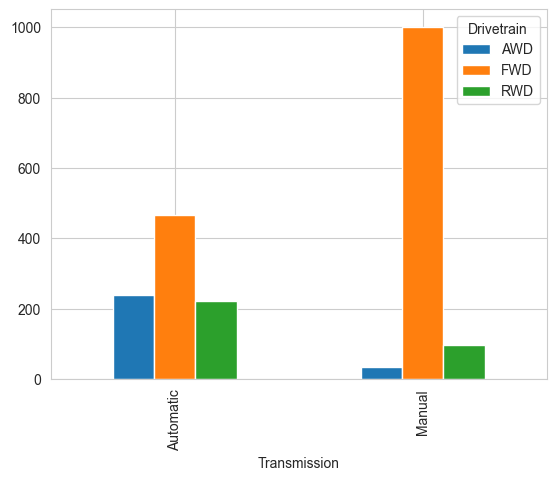

In [143]:
ct = pd.crosstab(df['Transmission'], df['Drivetrain'])
ct.plot.bar()

Заметим, что почти все авто с механической коробкой передач имеют передний привод. А вот у автомобилей с автоматической коробкой передач привод более разнообразен, хотя передний все равно встречается чаще.

Посмотрим, какой тип топлива встречается у автомобилей с механической и автоматической трансмиссией. Будем рассматривать только бензин, дизель, газ (CNG) и остальные типы, объединенные в Other.

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\3492409863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuel['Fuel Type'] = df_fuel['Fuel Type'].apply(


<Axes: xlabel='Transmission'>

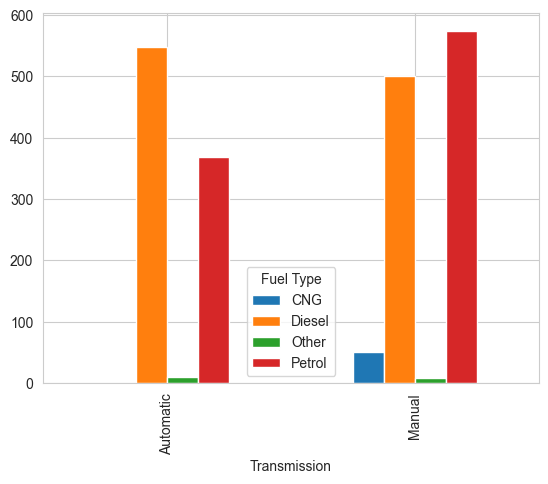

In [144]:
df_fuel = df[['Transmission', 'Fuel Type']]
df_fuel['Fuel Type'] = df_fuel['Fuel Type'].apply(
    lambda x: x if x in ['Petrol', 'Diesel', 'CNG'] else 'Other')

ct = pd.crosstab(df_fuel['Transmission'], df_fuel['Fuel Type'])
ct.plot.bar()

Видно, что у автомобилей с механической коробкой передач чаще встречается бензин, а у автоматической - дизель. Также важно, что автомобили на газу (CNG) встречаются только с механической коробкой передач.

Посмотрим на распределение года выпуска автомобилей с механической и автоматической трансмиссией.

<Axes: xlabel='Transmission', ylabel='Year'>

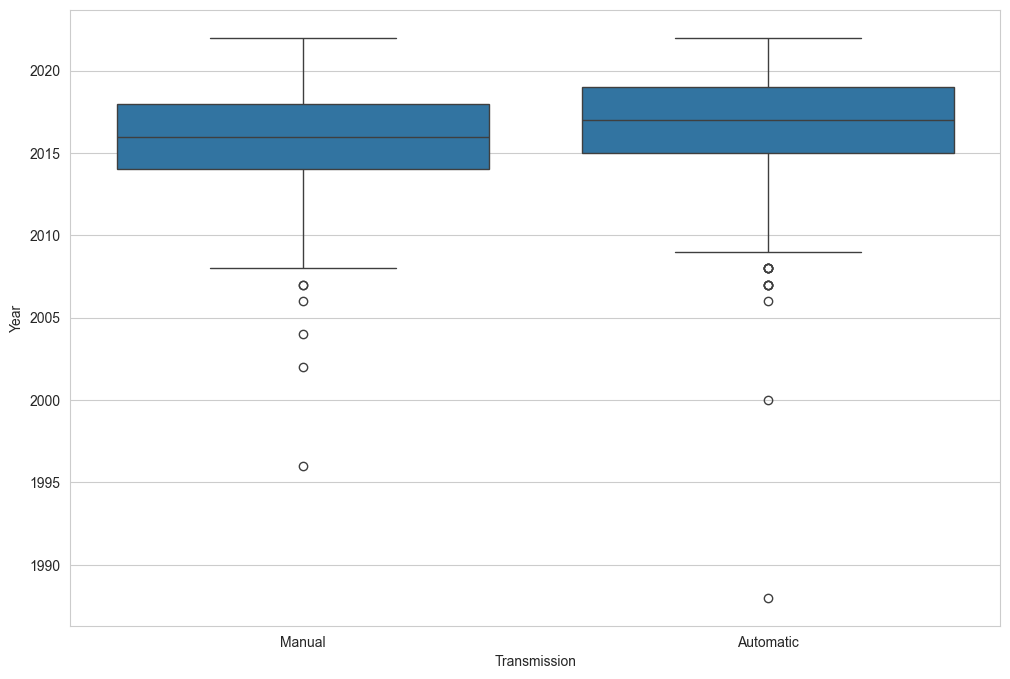

In [145]:
df_year = df[['Transmission', 'Year']]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Year', data=df_year)

Видно, что автомобили с автоматической коробкой передач в среднем более новые, чем с механической, так что предиктор Year может быть важным.

Посмотрим на распределение мощности двигателя у автомобилей с механической и автоматической трансмиссией.

<Axes: xlabel='Transmission', ylabel='Max Power'>

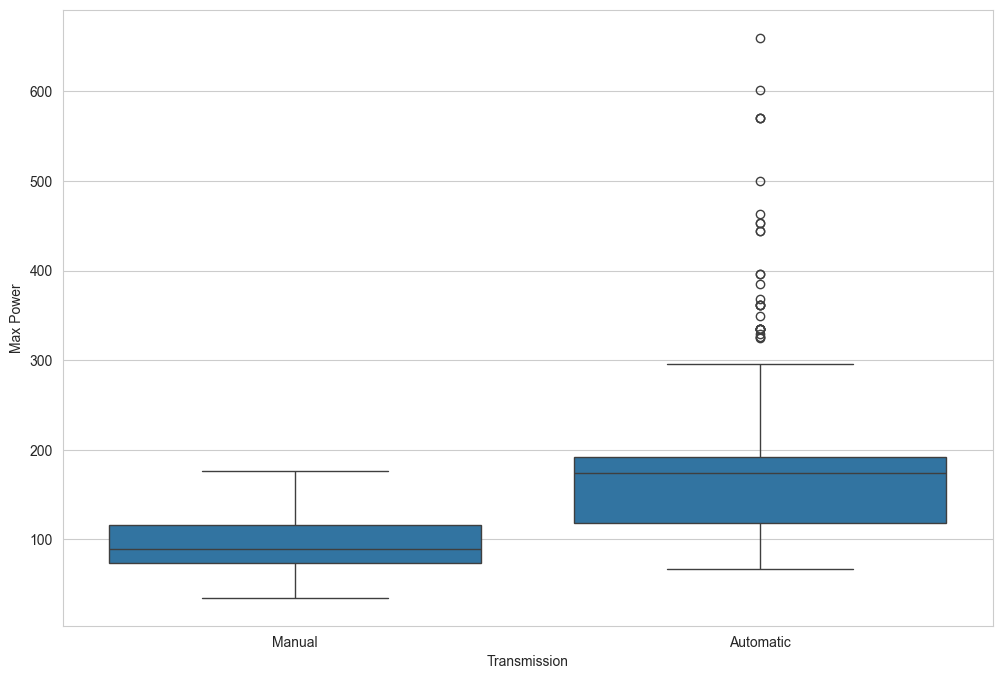

In [146]:
df_power = df[['Transmission', 'Max Power']]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Max Power', data=df_power)

Заметим, что авто на механике в среднем менее общие. При этом важно, что у автомобилей на механике вообще нет выбросов по мощности двигателя, в то время как у автоматических таких достаточно много.

Посмотрим на распределение пробега автомобилей с механической и автоматической трансмиссией.

<Axes: xlabel='Transmission', ylabel='Kilometer'>

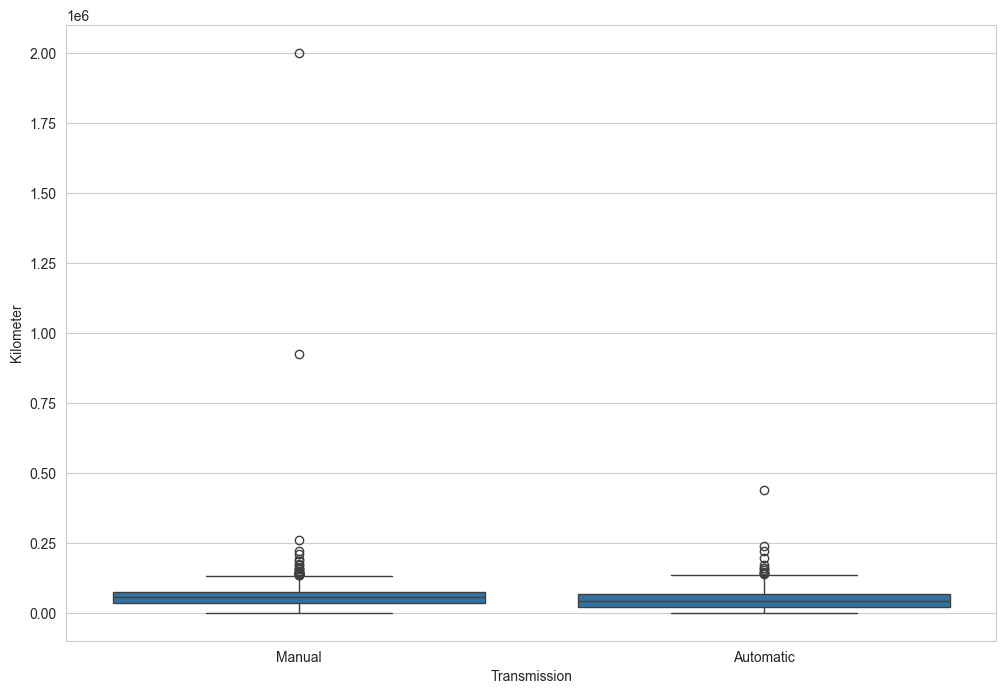

In [147]:
df_kilometer = df[['Transmission', 'Kilometer']]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Kilometer', data=df_kilometer)

Можем заметить, что пробег у авто с механикой в основном больше, чем у автоматических. Также у обоих типов есть выбросы. При этом среди автомобилей на механике есть Hyundai Verna (2018) с пробегом 925,000 км и Renault Duster (2016) с пробегом 2,000,000 км. Как будто бы это неправдоподобный пробег, все-таки это не фуры.

In [148]:
df[df['Kilometer'] > 500000]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Kilometer Per Year,Kilometer Category
1125,Renault,Duster 110 PS RXZ 4X2 MT Diesel,450000,2016,2000000,Diesel,Manual,Ranchi,White,1,...,108.00,248.00,FWD,"4,315.00","1,822.00","1,695.00",5.00,50.00,"285,714.29",Used
1866,Hyundai,Verna 1.6 CRDI SX,925000,2018,925000,Diesel,Manual,Karnal,White,1,...,126.00,260.00,FWD,"4,375.00","1,700.00","1,475.00",5.00,43.00,"185,000.00",Used


### Предикторы модели

Остановимся на этих предикторах:

1) Тип привода
2) Тип топлива
3) Год выпуска
4) Мощность двигателя
5) Пробег

Создам датафрейм для модели бинарной регрессии. Вместо трансмиссии будем использовать бинарную переменную Is Manual, где 1 - механическая коробка передач, 0 - автоматическая.

In [192]:
df_binary = df[['Transmission', 'Drivetrain', 'Fuel Type', 'Year', 'Max Power', 'Kilometer']]

df_binary['Is Manual'] = df_binary['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
df_binary.drop('Transmission', axis=1, inplace=True)

df_binary['Fuel Type'] = df_binary['Fuel Type'].apply(
    lambda x: x if x in ['Petrol', 'Diesel', 'CNG'] else 'Other')

C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1111832876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Is Manual'] = df_binary['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)
C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1111832876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.drop('Transmission', axis=1, inplace=True)
C:\Users\kitki\AppData\Local\Temp\ipykernel_25924\1111832876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

### Референтные группы

**Референтной группой по топливу будут автомобили на бензине**. Создадим дамми-переменные для типа топлива (кроме бензина).

In [193]:
fuel_type_dummies = pd.get_dummies(df_binary['Fuel Type'], prefix='Fuel Type', dtype=np.float64)
df_binary = pd.concat([df_binary, fuel_type_dummies], axis=1)
df_binary.drop('Fuel Type', axis=1, inplace=True)
df_binary.drop('Fuel Type_Petrol', axis=1, inplace=True)

df_binary

,Drivetrain,Year,Max Power,Kilometer,Is Manual,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Other
0,FWD,2017,87.00,87150,1,0.00,0.00,0.00
1,FWD,2014,74.00,75000,1,0.00,1.00,0.00
2,FWD,2011,79.00,67000,1,0.00,0.00,0.00
3,FWD,2019,82.00,37500,1,0.00,0.00,0.00
4,RWD,2018,148.00,69000,1,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...
2054,FWD,2016,138.00,90300,1,0.00,1.00,0.00
2055,FWD,2014,55.00,83000,1,0.00,0.00,0.00
2056,FWD,2013,70.00,73000,1,0.00,0.00,0.00
2057,RWD,2018,188.00,60474,0,0.00,1.00,0.00


**Референтной группой по приводу будут автомобили с передним приводом**. Создадим дамми-переменные для типа привода (кроме переднего).

In [194]:
drivetrain_dummies = pd.get_dummies(df_binary['Drivetrain'], prefix='Drivetrain', dtype=np.float64)
df_binary = pd.concat([df_binary, drivetrain_dummies], axis=1)
df_binary.drop('Drivetrain', axis=1, inplace=True)
df_binary.drop('Drivetrain_FWD', axis=1, inplace=True)

df_binary

,Year,Max Power,Kilometer,Is Manual,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Other,Drivetrain_AWD,Drivetrain_RWD
0,2017,87.00,87150,1,0.00,0.00,0.00,0.00,0.00
1,2014,74.00,75000,1,0.00,1.00,0.00,0.00,0.00
2,2011,79.00,67000,1,0.00,0.00,0.00,0.00,0.00
3,2019,82.00,37500,1,0.00,0.00,0.00,0.00,0.00
4,2018,148.00,69000,1,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...
2054,2016,138.00,90300,1,0.00,1.00,0.00,0.00,0.00
2055,2014,55.00,83000,1,0.00,0.00,0.00,0.00,0.00
2056,2013,70.00,73000,1,0.00,0.00,0.00,0.00,0.00
2057,2018,188.00,60474,0,0.00,1.00,0.00,0.00,1.00


### Гипотезы исследования

Сформулируем ряд гипотез:

- Основная гипотеза (H₀): переменные Drivetrain, Fuel Type, Year, Max Power, Kilometer не имеют статистически значимого влияния на тип трансмиссии автомобиля.
- Альтернативная гипотеза (H₁): переменные имеют статистически значимое влияние на тип трансмиссии автомобиля.

Также для каждой независимой переменной можно выдвинуть следующие частные гипотезы:

- H₀: Drivetrain не влияет на тип трансмиссии автомобиля.
- H₁: Drivetrain влияет на тип трансмиссии автомобиля.
- H₀: Fuel Type не влияет на тип трансмиссии автомобиля.
- H₁: Fuel Type влияет на тип трансмиссии автомобиля.
- H₀: Year не влияет на тип трансмиссии автомобиля.
- H₁: Year влияет на тип трансмиссии автомобиля.
- H₀: Max Power не влияет на тип трансмиссии автомобиля.
- H₁: Max Power влияет на тип трансмиссии автомобиля.
- H₀: Kilometer не влияет на тип трансмиссии автомобиля.
- H₁: Kilometer влияет на тип трансмиссии автомобиля.

### Корреляционная матрица

<Axes: >

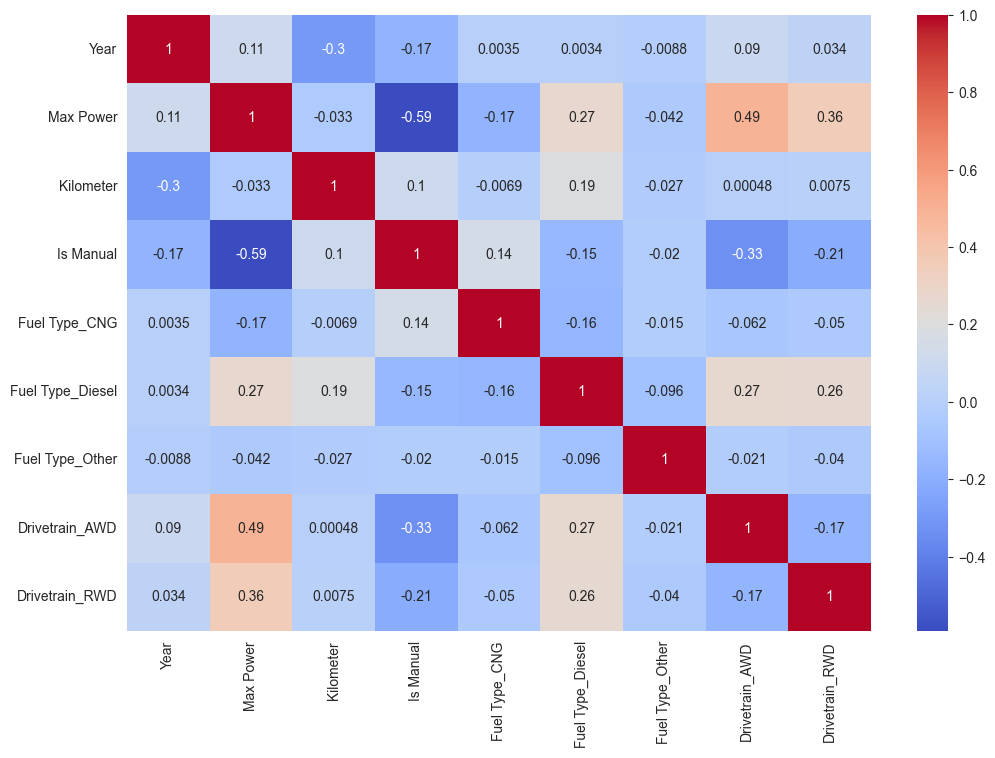

In [195]:
corr_matrix = df_binary.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Как видим, между переменными нет слишком сильной корреляции, что хорошо.

### Построение модели

In [198]:
x_mult = df_binary[['Drivetrain_AWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_CNG', 'Fuel Type_Other', 'Year', 'Max Power', 'Kilometer']]

y = df_binary['Is Manual']
x_mult_constant = sm.add_constant(x_mult)

In [199]:
logit_model = sm.Logit(y, x_mult_constant).fit()
print(logit_model.summary())

         Current function value: 0.397747
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Is Manual   No. Observations:                 2059
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.4220
Time:                        15:55:03   Log-Likelihood:                -818.96
converged:                      False   LL-Null:                       -1416.8
Covariance Type:            nonrobust   LLR p-value:                8.512e-253
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               57.4134     44.186      1.299      0.194     -29.190     144.017
Drivetrain_AWD       0.2068      0.265      0.7

C:\Users\kitki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
